In [1]:
#RNN
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [2]:
# vocabulary size
max_features=10000
max_len=150

In [3]:
# data
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)

In [4]:
# padding
x_train=sequence.pad_sequences(x_train,maxlen=max_len)
x_test=sequence.pad_sequences(x_test,maxlen=max_len)

In [5]:
# build an rnn model
model_rnn=models.Sequential()
model_rnn.add(layers.Embedding(max_features,32))
model_rnn.add(layers.SimpleRNN(32))
model_rnn.add(layers.Dense(1,activation='sigmoid'))

In [6]:
# compile
model_rnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
#model train
history_rnn=model_rnn.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5787 - loss: 0.6599 - val_accuracy: 0.8124 - val_loss: 0.4267
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8494 - loss: 0.3575 - val_accuracy: 0.8344 - val_loss: 0.3903
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9203 - loss: 0.2144 - val_accuracy: 0.8180 - val_loss: 0.4052
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9669 - loss: 0.1069 - val_accuracy: 0.8362 - val_loss: 0.4560
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9876 - loss: 0.0485 - val_accuracy: 0.8244 - val_loss: 0.5303


In [8]:
#evaluate
test_loss,test_acc=model_rnn.evaluate(x_test,y_test)
print(f"Test Rnn:{test_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8137 - loss: 0.5642
Test Rnn:0.8152400255203247


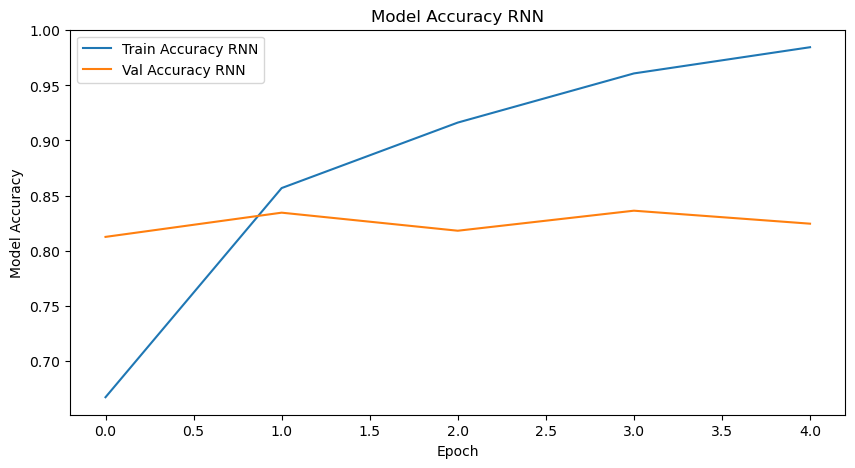

In [9]:
#visualization
plt.figure(figsize=(10,5))
plt.plot(history_rnn.history['accuracy'],label='Train Accuracy RNN')
plt.plot(history_rnn.history['val_accuracy'],label='Val Accuracy RNN')
plt.title('Model Accuracy RNN')
plt.xlabel('Epoch')
plt.ylabel('Model Accuracy')
plt.legend()

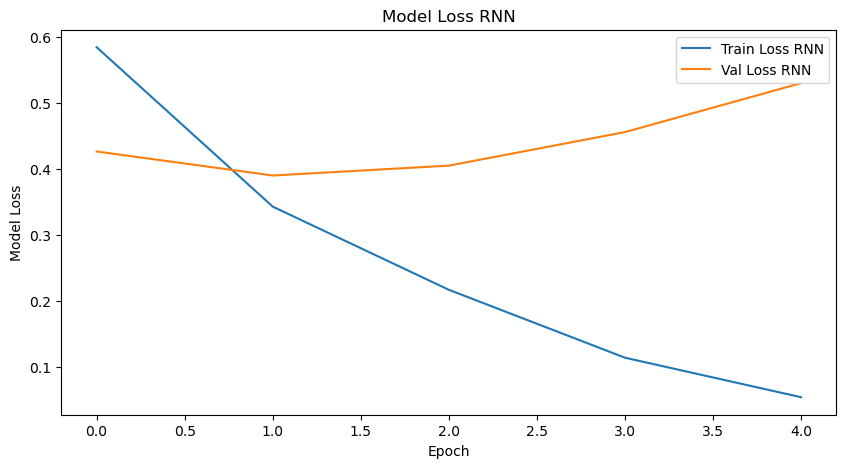

In [10]:
plt.figure(figsize=(10,5))
plt.plot(history_rnn.history['loss'],label='Train Loss RNN')
plt.plot(history_rnn.history['val_loss'],label='Val Loss RNN')
plt.title('Model Loss RNN')
plt.xlabel('Epoch')
plt.ylabel('Model Loss')
plt.legend()

In [11]:
predictions_rnn=model_rnn.predict(x_test[:5])
for i,prediction in enumerate(predictions_rnn):
    sentiment='Positive' if prediction>0.5 else 'Negative'
    print(f"Review {i+1} (RNN):Predicted Sentiment:{sentiment},Actual Sentiment:{'Positive' if y_test[i]==1 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Review 1 (RNN):Predicted Sentiment:Negative,Actual Sentiment:Negative
Review 2 (RNN):Predicted Sentiment:Positive,Actual Sentiment:Positive
Review 3 (RNN):Predicted Sentiment:Positive,Actual Sentiment:Positive
Review 4 (RNN):Predicted Sentiment:Negative,Actual Sentiment:Negative
Review 5 (RNN):Predicted Sentiment:Positive,Actual Sentiment:Positive


In [12]:
# lstm
# build an lstm model
model_lstm=models.Sequential()
model_lstm.add(layers.Embedding(max_features,32))
model_lstm.add(layers.LSTM(64))
model_lstm.add(layers.Dense(1,activation='sigmoid'))

In [13]:
# compile
model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
# train lstm model
history_lstm=model_lstm.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.6971 - loss: 0.5478 - val_accuracy: 0.8594 - val_loss: 0.3298
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9010 - loss: 0.2522 - val_accuracy: 0.8572 - val_loss: 0.3237
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9331 - loss: 0.1838 - val_accuracy: 0.8566 - val_loss: 0.3424
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9495 - loss: 0.1414 - val_accuracy: 0.8558 - val_loss: 0.3972
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9613 - loss: 0.1132 - val_accuracy: 0.8474 - val_loss: 0.4100


In [15]:
# evaluate
test_loss,test_acc_lstm=model_lstm.evaluate(x_test,y_test)
print(f"Test lstm:{test_acc_lstm}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8472 - loss: 0.4154
Test lstm:0.8478800058364868


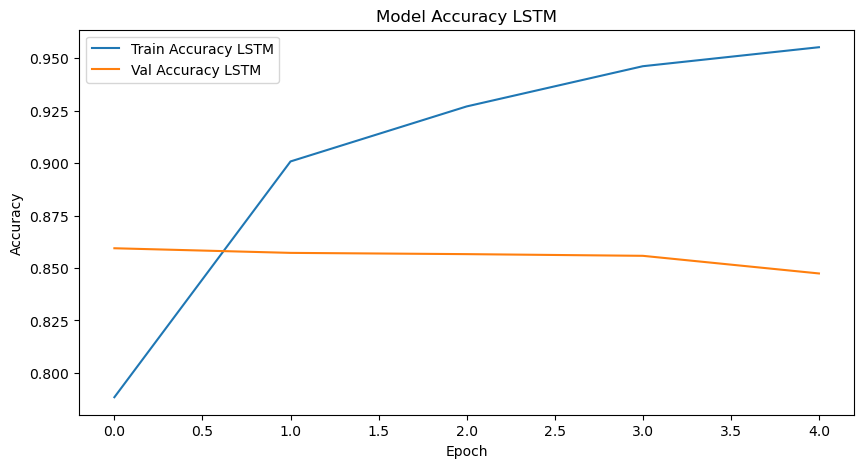

In [16]:
# visualization
plt.figure(figsize=(10,5))
plt.plot(history_lstm.history['accuracy'],label='Train Accuracy LSTM')
plt.plot(history_lstm.history['val_accuracy'],label='Val Accuracy LSTM')
plt.title('Model Accuracy LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

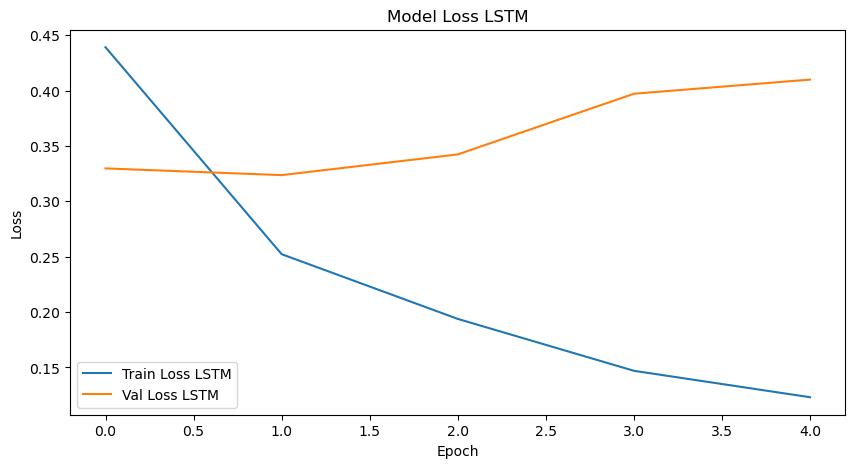

In [17]:
plt.figure(figsize=(10,5))
plt.plot(history_lstm.history['loss'],label='Train Loss LSTM')
plt.plot(history_lstm.history['val_loss'],label='Val Loss LSTM')
plt.title('Model Loss LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [18]:
predictions_lstm=model_lstm.predict(x_test[3:10])
for i,prediction in enumerate(predictions_lstm):
    sentiment='Positive' if prediction>0.5 else 'Negative'
    print(f"Review {i+1} (LSTM):Predicted Sentiment:{sentiment},Actual Sentiment:{'Positive' if y_test[i]==1 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Review 1 (LSTM):Predicted Sentiment:Negative,Actual Sentiment:Negative
Review 2 (LSTM):Predicted Sentiment:Positive,Actual Sentiment:Positive
Review 3 (LSTM):Predicted Sentiment:Positive,Actual Sentiment:Positive
Review 4 (LSTM):Predicted Sentiment:Positive,Actual Sentiment:Negative
Review 5 (LSTM):Predicted Sentiment:Negative,Actual Sentiment:Positive
Review 6 (LSTM):Predicted Sentiment:Positive,Actual Sentiment:Positive
Review 7 (LSTM):Predicted Sentiment:Positive,Actual Sentiment:Positive
